# Dimensionality Reduction
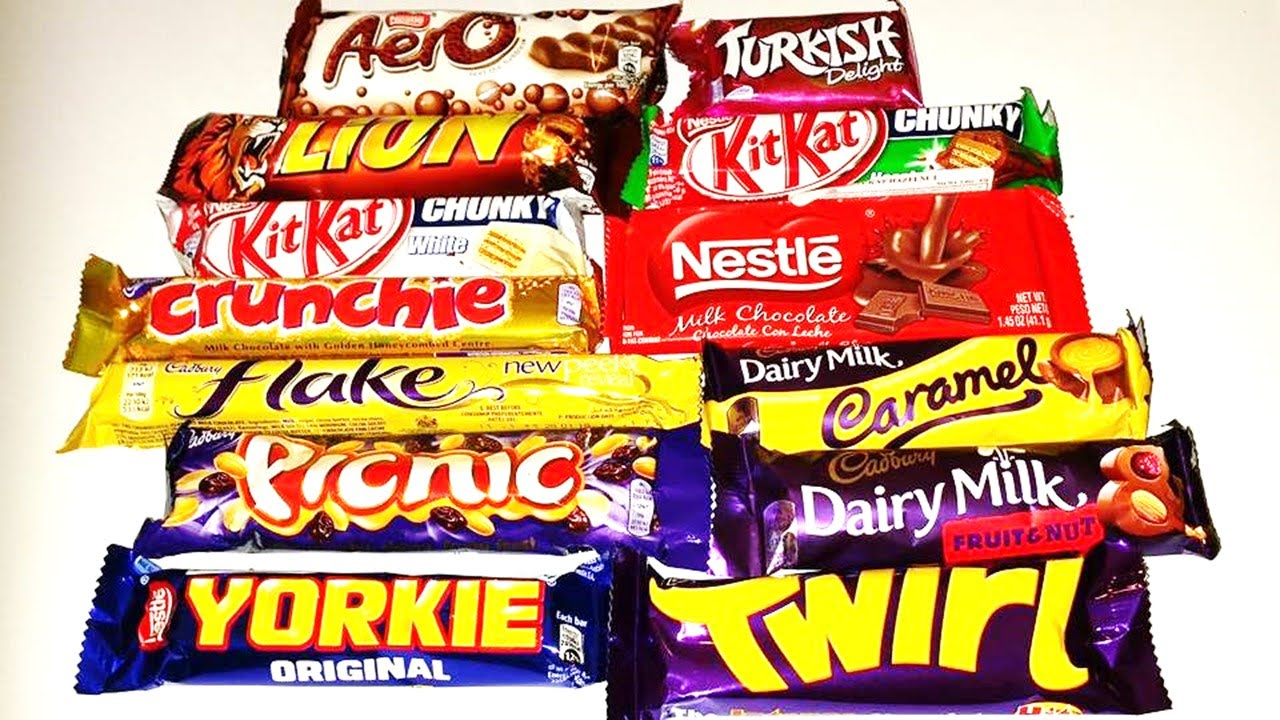

## Features -> Brand
* Size (Length, Width)
* Weight
* Manufacturer
* Image of Wrapper
* Ingredient List
* Price

## Describe that Candy Bar
* Feature Selection - Pick the best feature(s) to identify the candy bar?
* Dimensionality Reduction - What existing / new feature(s) could we use to reconstruct the brand?

# Setup

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from sklearn.datasets import make_regression
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics import mean_squared_error

from yellowbrick.features import Manifold

# Principal Components Analysis

## Intuition
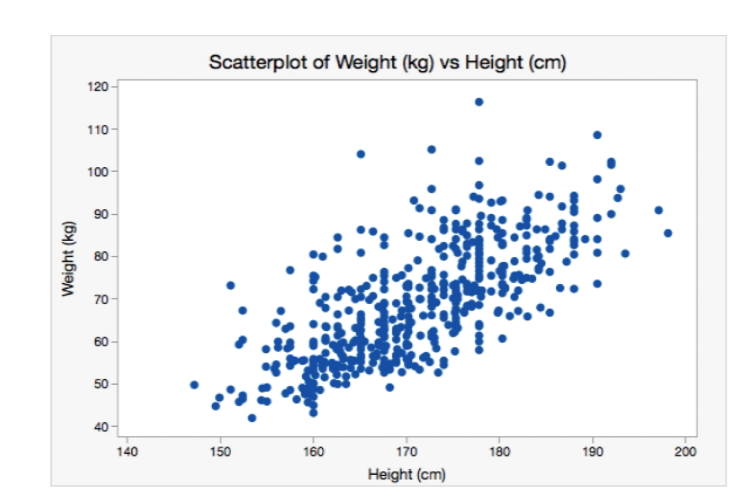

## Rotate
* Variance is signal
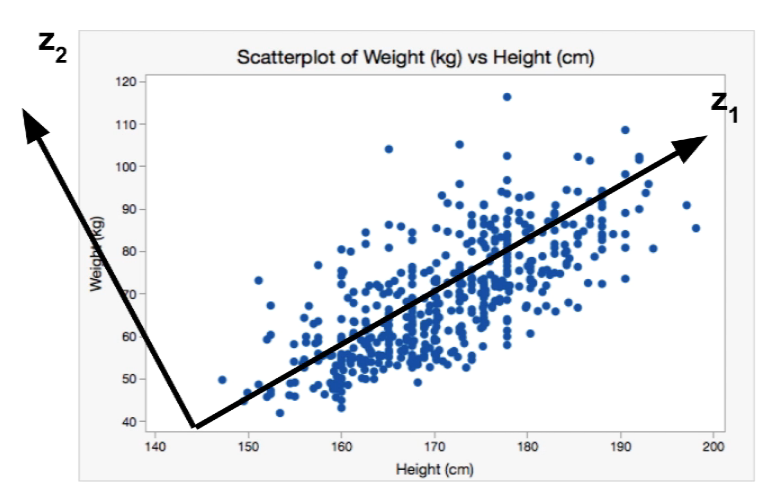

## Simple Data

In [207]:
# Define Data
data = np.array([[1, 2],
                 [3, 4],
                 [5, 6]])

## Numpy Implementation

In [217]:
# Compute colmeans
means = np.mean(data.T, axis=1)

# Center the data
centered = data - means

# Find the covariance matrix
#   Diagonal = Variance of the Component
#   Symmetric Off Diag = Variance Between Components
covariance = np.cov(centered.T)

# Perform eigenvalue decomposition
eigval, eigvec = np.linalg.eig(covariance)
explained = np.array([eigval[i] ** 2 / sum(eigval ** 2) for i in range(len(eigval))])

# Project data
projected = eigvec.T.dot(centered.T)

In [218]:
print('Eignenvalues', eigval)
print('Explained Variance Total', explained)
print('Eigenvectors \n', eigvec.T)
print('Projected\n', projected.T)

Eignenvalues [8. 0.]
Explained Variance Total [1. 0.]
Eigenvectors 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Projected
 [[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


## SKLearn Implementation

In [197]:
pcaTest = PCA(2)
pcaResults = pcaTest.fit(data)
print('Explained Variance', pcaResults.explained_variance_)
print('Explained Variance Total', pcaResults.explained_variance_ratio_)
print('Components\n', pcaResults.components_)
print('Projected\n', pcaResults.transform(data))

Explained Variance [8. 0.]
Explained Variance Total [1. 0.]
Components
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Projected
 [[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


## Eigenvectors & Eigenvalues
\begin{equation}A\,\vec \eta  = \lambda \vec \eta \label{eq:eq1} \end{equation}
* Eigenvector is a special vector that when multiplied by a matrix:
    * Direction is preserved
    * Length is changed  
* In the image
    * The red lines show two eigenvectors
    * The yellow line is not an eigenvector
* The red lines do change their magnitude (scaled)
* The scaling is your eigenvalue
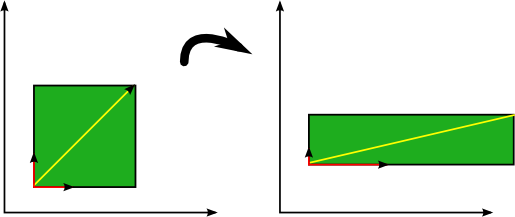
https://www.visiondummy.com/2014/03/eigenvalues-eigenvectors

# Digits
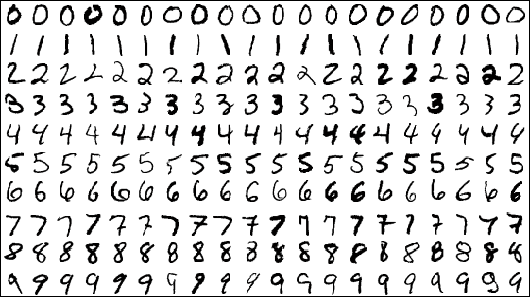

In [140]:
digits = load_digits()
X = digits['data']
y = digits['target']
X.shape

(1797, 64)

In [354]:
def plotDigits(data, y=y, skip=5):
    plt.figure(figsize=(12,10))
    plt.scatter(data[:,0], data[:,1], alpha=0.5, cmap='viridis', c=y)
    plot = 0
    for ix, num in enumerate(y):
        plot += 1
        if plot % skip == 0:
            plt.annotate(str(num), (data[ix, 0], data[ix, 1]))

## Run PCA

In [155]:
pca = PCA(n_components=X.shape[1])
pca.fit_transform(X)

array([[-1.25946645e+00,  2.12748835e+01, -9.46305462e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  4.46141155e-14],
       [ 7.95761130e+00, -2.07686990e+01,  4.43950604e+00, ...,
         1.10270034e-15,  1.69009007e-15,  1.67046393e-16],
       [ 6.99192297e+00, -9.95598641e+00,  2.95855808e+00, ...,
         4.37816490e-16,  9.44231016e-16,  1.16654252e-16],
       ...,
       [ 1.08012837e+01, -6.96025223e+00,  5.59955453e+00, ...,
        -2.81906159e-16, -5.68614519e-17,  9.70809841e-17],
       [-4.87210009e+00,  1.24239536e+01, -1.01708664e+01, ...,
        -7.89602738e-17,  8.41756659e-17, -1.23762878e-16],
       [-3.44389631e-01,  6.36554919e+00,  1.07737085e+01, ...,
        -2.80367805e-17, -1.48549716e-16,  2.70670966e-16]])

## Explained Variance

In [223]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

## Importance

Text(0, 0.5, 'Importance')

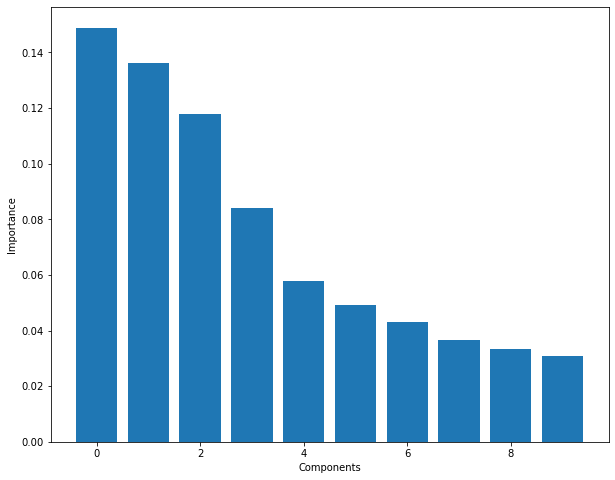

In [261]:
plt.figure(figsize=(10,8))
plt.bar(range(10), pca.explained_variance_ratio_[0:10])
plt.xlabel('Components')
plt.ylabel('Importance')

## Variation Explained
* Sum of all principal components = 100%

In [276]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

Text(0, 0.5, 'Cumulative Explained Var')

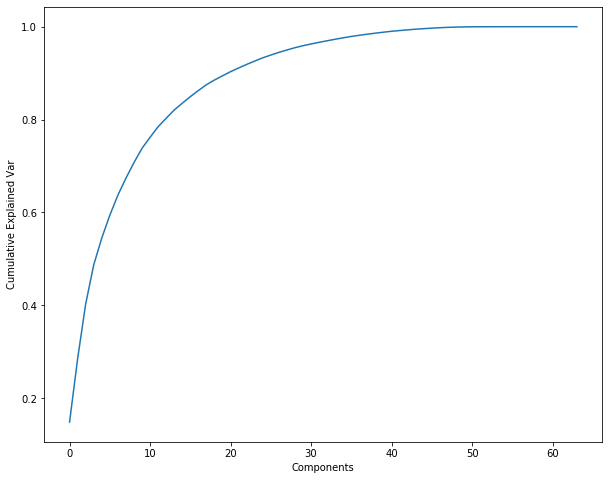

In [275]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Var')

In [259]:
pca.explained_variance_ratio_[0:5].sum()

0.5449635267268982

## Digit Plot

In [227]:
pca = PCA(n_components=64)
projected = pca.fit_transform(X)

## First 2 Principals

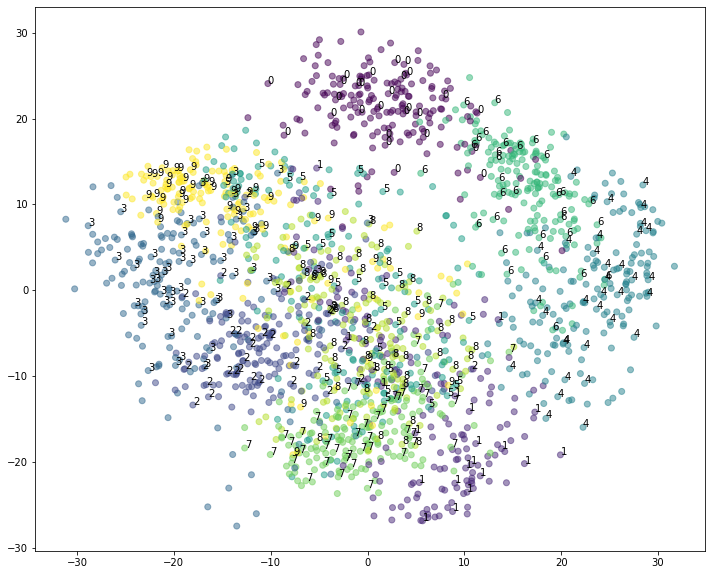

In [335]:
plotDigits(projected)

## Later Principals

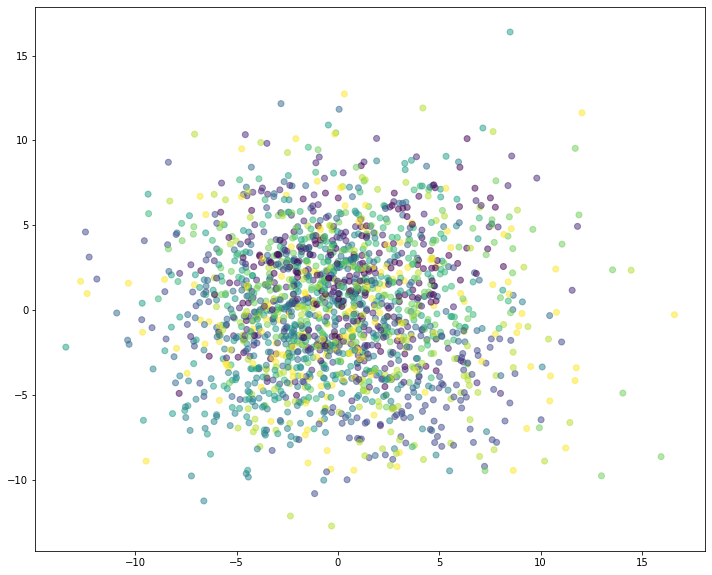

In [298]:
plt.figure(figsize=(12,10))
plt.scatter(projected[:,-50], projected[:,-49], alpha=0.5, 
            cmap='viridis', c=y)

# Singular Value Decomposition
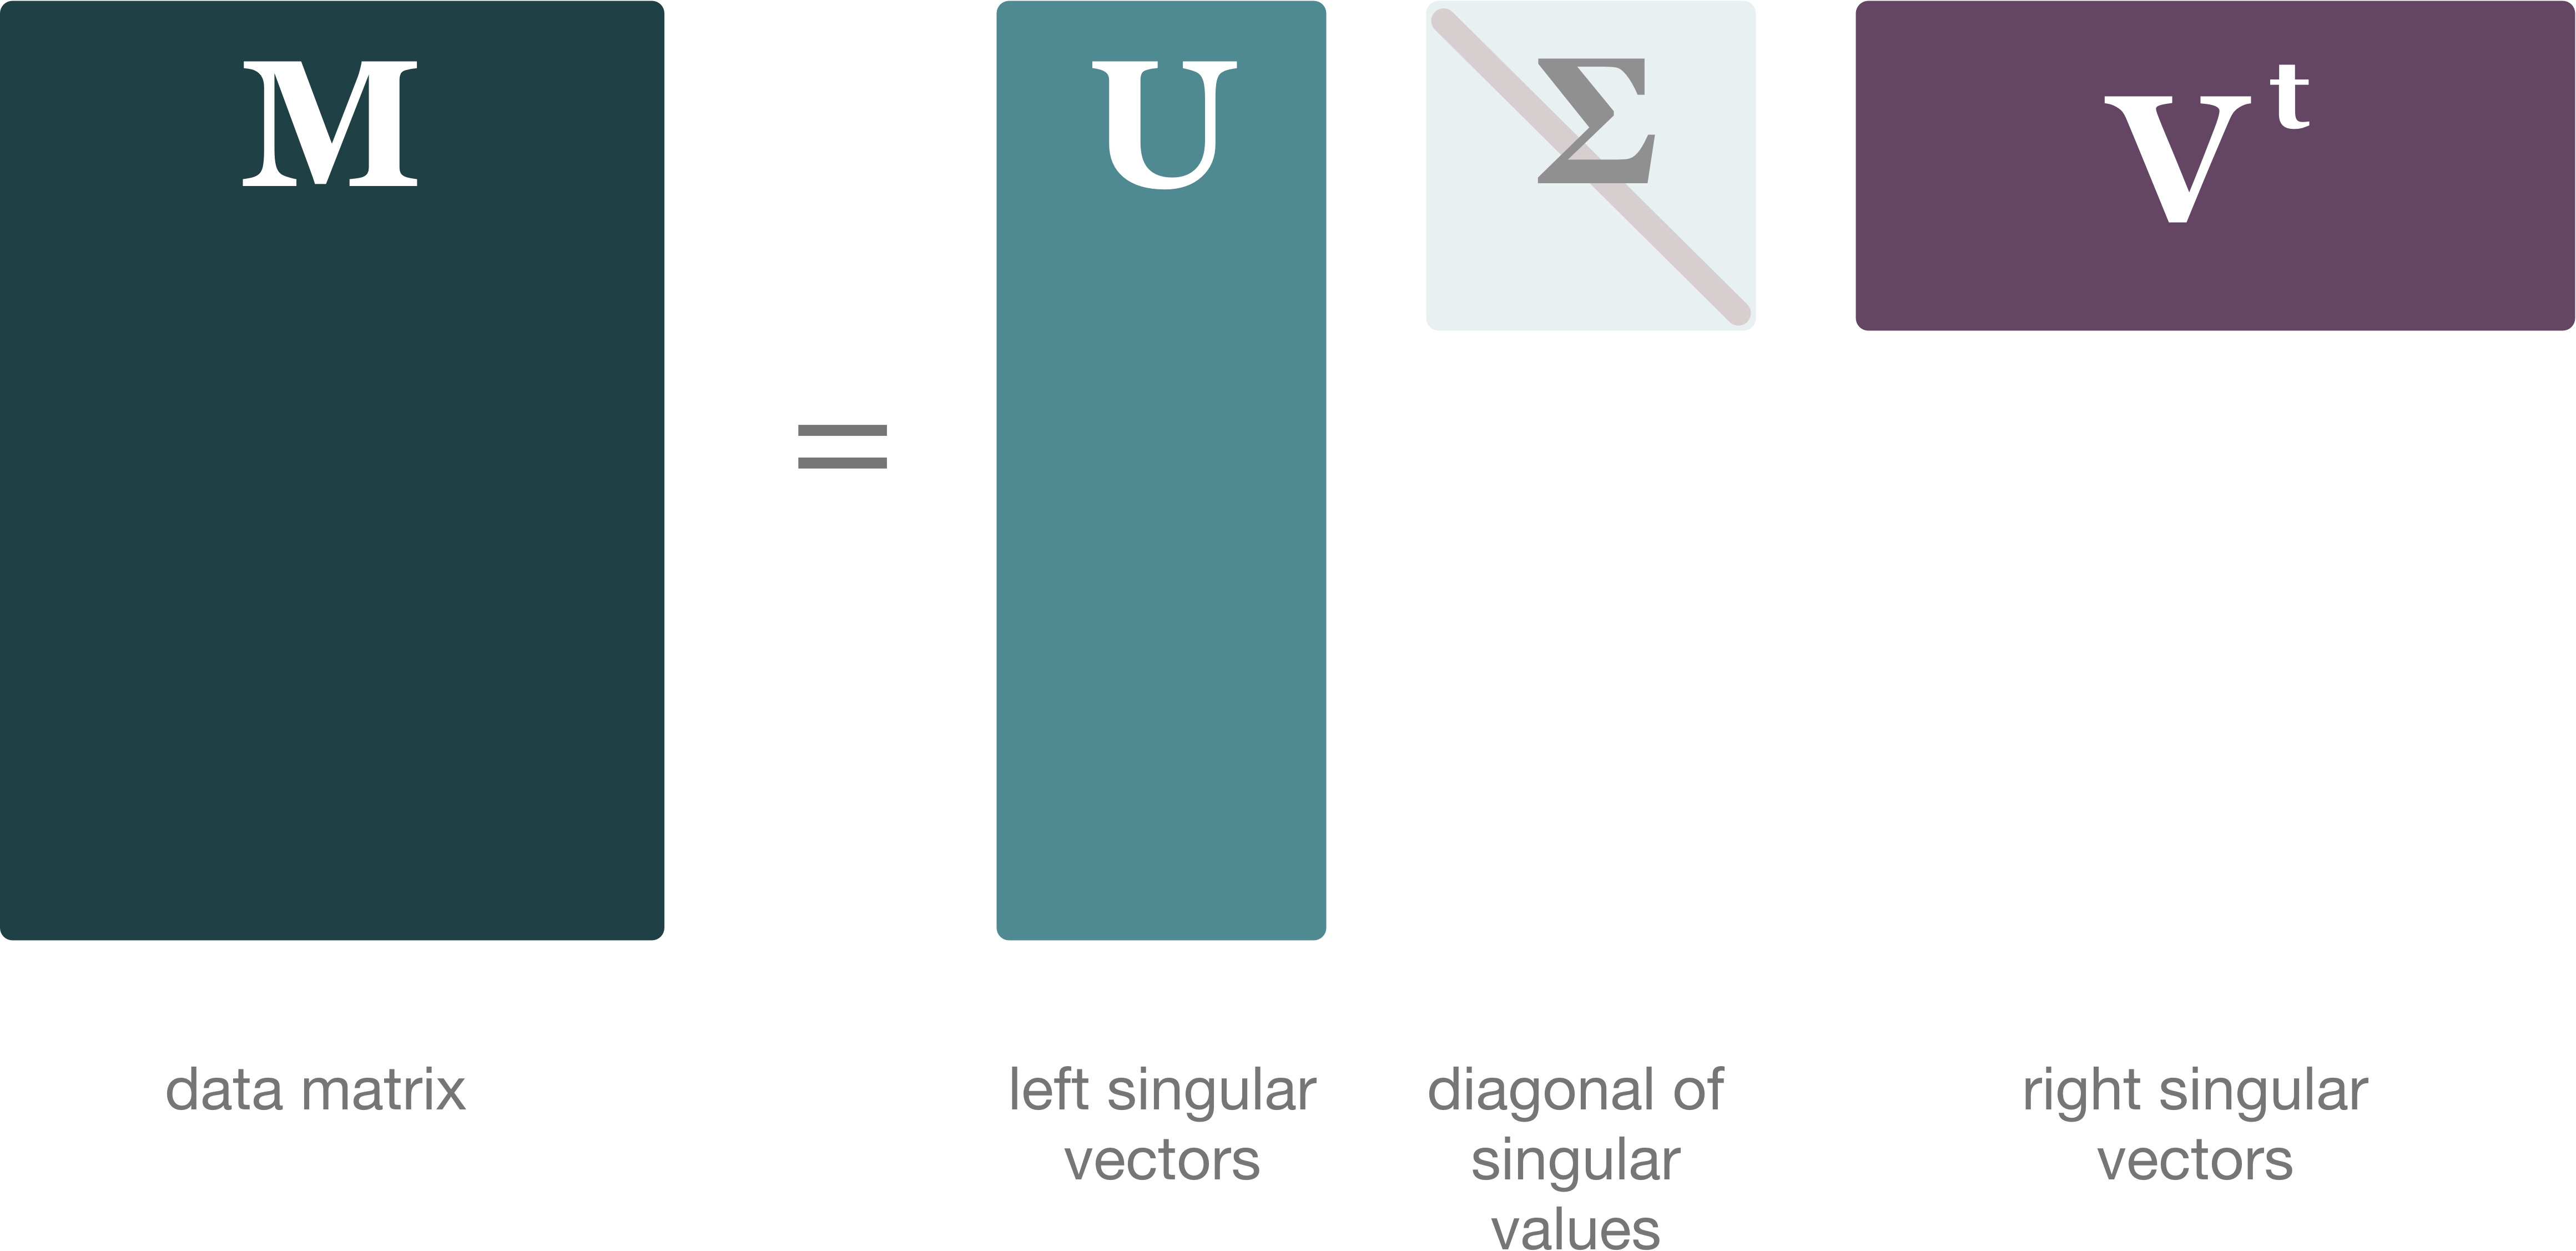

In [334]:
svd = TruncatedSVD(n_components=10, 
                      algorithm='randomized',
                      n_iter=5,
                      random_state=1337)
X_train_svd = svd.fit_transform(X)

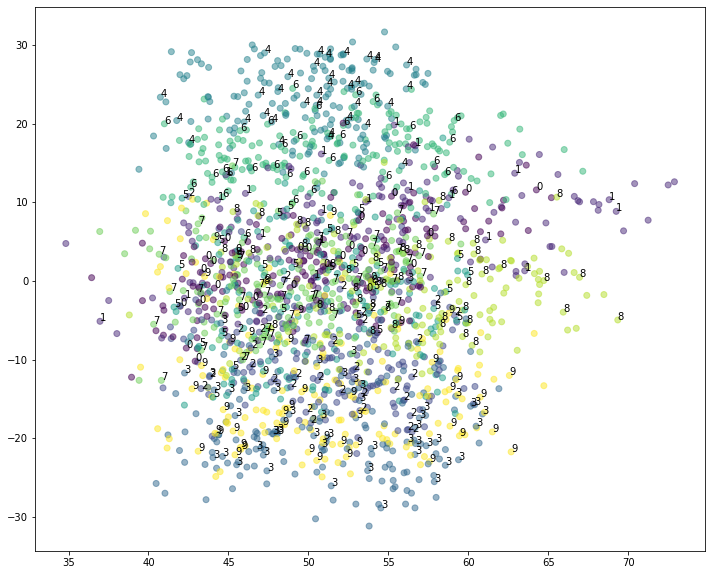

In [333]:
plotDigits(X_train_svd)

## Importance

Text(0, 0.5, 'Importance')

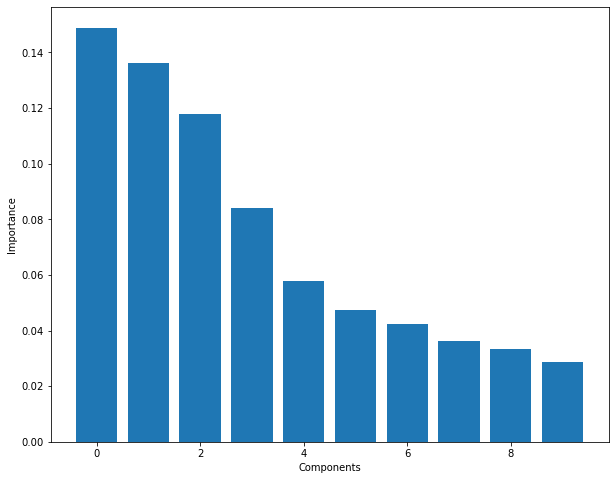

In [273]:
plt.figure(figsize=(10,8))
plt.bar(range(10), sorted(svd.explained_variance_ratio_[0:10], reverse=True))
plt.xlabel('Components')
plt.ylabel('Importance')

## Storage / Memory
* This simple calculator compares memory footprint between a dense matrix and the corresponding sizes of the three svd matrixes

In [253]:
@interact
def spaceSaver(rows='100', cols='100', components='5'):
    rows = int(rows)
    cols = int(cols)
    components = int(components)
    print('Original Space', rows * cols)
    print('SVD Space', rows * components + cols * components + components)
    print('\n')
    print(f'U Shape ({rows}, {components})')
    print(f'S Shape ({components}, {components})')
    print(f'V.T Shape ({components}, {cols})')

interactive(children=(Text(value='100', description='rows'), Text(value='100', description='cols'), Text(value…

# Random Projection
* Built around Johnson-Lindenstrauss
    * Points in high dimension space can be embedded in low dimension space
    * Distances can be preserved
* Two flavors
    * Gaussian Random Projection
    * Sparse Random Projection (Faster, retains sparsity)
* Specify:
    * Number of components
    * EPS, which controls quality of embedding (smaller - higher dimensions)

In [427]:
grp = GaussianRandomProjection(n_components=2, 
                               eps=.5,
                               random_state=1002)
X_train_grp = grp.fit_transform(X)

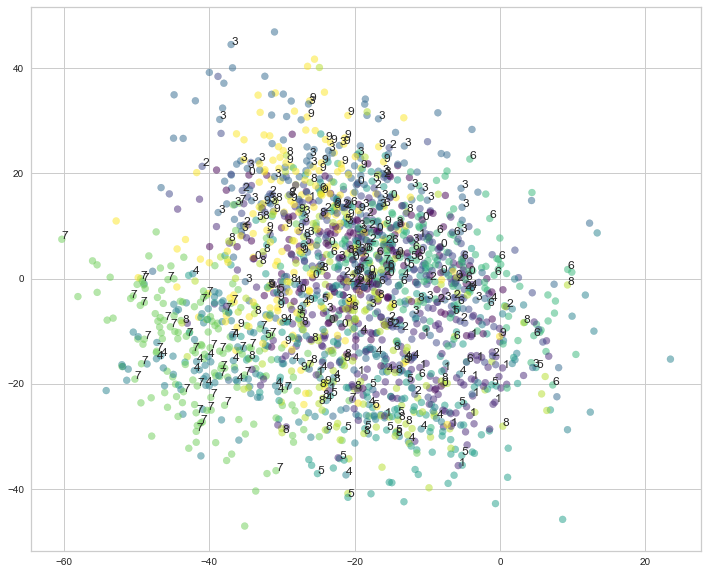

In [426]:
plotDigits(X_train_grp)

# T-SNE
* T-Distributed Stochastic Neighboring Entities
* Non-linear method co-developed by Hinton
* Minimize the Kullback–Leibler divergence between two distribtions:
    * One measures pairwise similarities of the high dimensional input
    * The other measures pairwise similarities of the corresponding low dimensional output
* Computationally expensive (Quadratic scaling in N)
* Real world
    * Down sample
    * Use PCA then T-SNE for large datasets

In [355]:
tSNE = TSNE(n_components=2, 
           learning_rate=300,
           perplexity=30,
           early_exaggeration=10,
           random_state=1000)
X_train_tsne = tSNE.fit_transform(X)

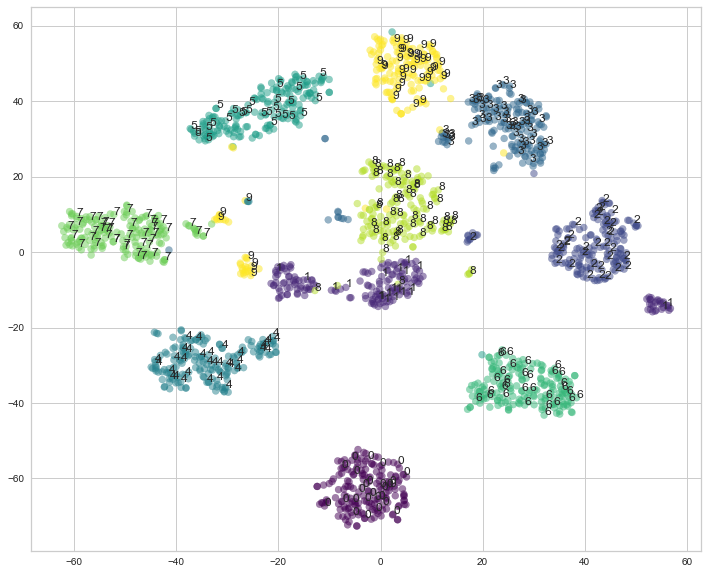

In [356]:
plotDigits(X_train_tsne)

## t-SNE XOR
* XOR Cloud
* Labels are colored, but unknown to t-SNE
* What kind of shape would t-SNE make?
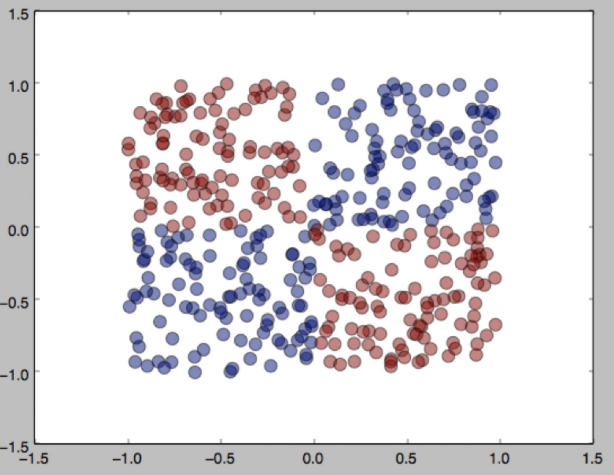

## t-SNE Transformed XOR
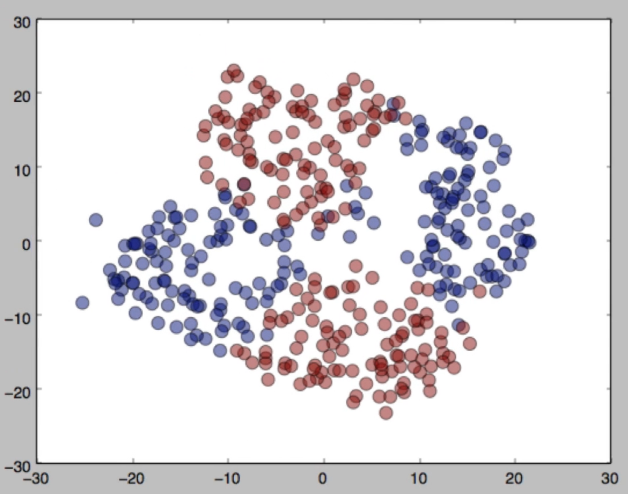
* https://www.udemy.com/course/unsupervised-deep-learning-in-python/

# Locally Linear Embedding
* Preserve the distance within local neighborhoods
* Project the data into a reduced space

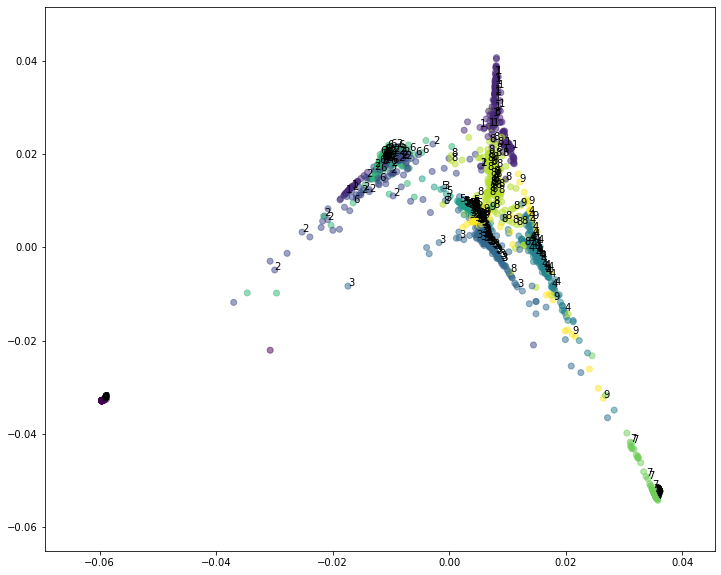

In [331]:
lle = LocallyLinearEmbedding(n_neighbors = 10,
                            n_components = 2)
X_train_lle = lle.fit_transform(X)
plotDigits(X_train_lle)

# Multidimensional Scaling
* Learn the similarity of points in the dataset 
* Model the data in a lower dimensional space

In [336]:
mds = MDS(n_components=2, 
         n_init=10,
         max_iter=100)
X_train_mds = mds.fit_transform(X)

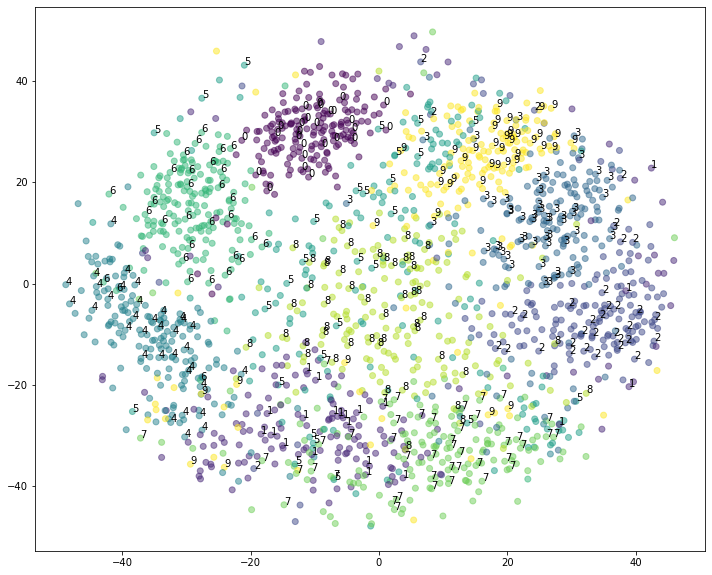

In [337]:
plotDigits(X_train_mds)

# YellowBrick Visualizer

In [370]:
v = ['lle', 'ltsa', 'hessian', 'modified', 'isomap', 'mds', 'spectral', 'tsne']
@interact
def yellowbrickDigits(manifold=v):
    fig, ax = plt.subplots(figsize=(12,10))
    viz = Manifold(manifold=manifold, ax=ax)
    viz.fit_transform(X, y)

interactive(children=(Dropdown(description='manifold', options=('lle', 'ltsa', 'hessian', 'modified', 'isomap'…

# Applications

## Reconstruction

In [406]:
@interact
def reconstruct(explained=(0.0, 1.0, 0.05), image=(0, 9)):
    if explained >= 1.0: explained = 64
    if explained <= 0.0: explained = 2
        
    pcaRecon = PCA(explained)
    X_pca = pcaRecon.fit_transform(X)
    print(f'Components {pcaRecon.n_components_}')
    approx = pcaRecon.inverse_transform(X_pca)
    plt.subplot(1,2,1)
    plt.imshow(X[image].reshape(8,8))
    plt.title('Original')
    
    plt.subplot(1,2,2)
    plt.imshow(approx[image].reshape(8,8))
    plt.title('Reconstructed')
    
    mse = mean_squared_error(approx[image], X[image])
    print(f'MSE = {mse}')

interactive(children=(FloatSlider(value=0.5, description='explained', max=1.0, step=0.05), IntSlider(value=4, …

## Removing Noise
* Large Variations = Signal <-- Numbers
* Small Variations = Noise <-- Pixelated Noise
* Separate Large Variation from Small Variation = Separate Signal from Noise
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### Original Digits

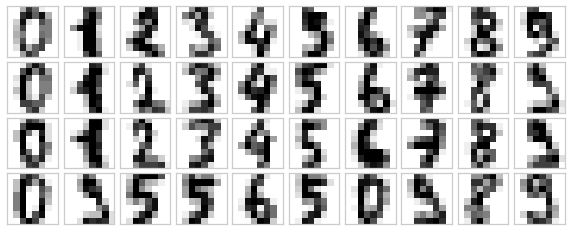

In [412]:
fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='binary', interpolation='nearest',clim=(0, 16))

### Noisy Digits

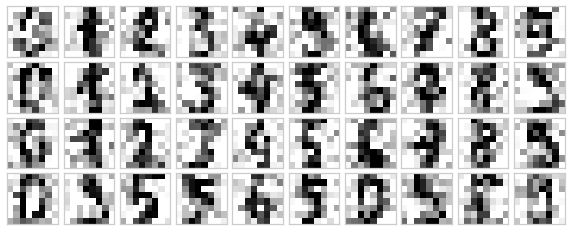

In [411]:
noise = np.random.normal(X, 4)
fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(noise[i].reshape(8, 8), cmap='binary', interpolation='nearest',clim=(0, 16))

### Filter Noise

In [414]:
# Train on 50% variance
pcaNoise = PCA(0.5)
pcaNoise.fit(noise)
filtered = pcaNoise.transform(noise)
filtered = pcaNoise.inverse_transform(filtered)

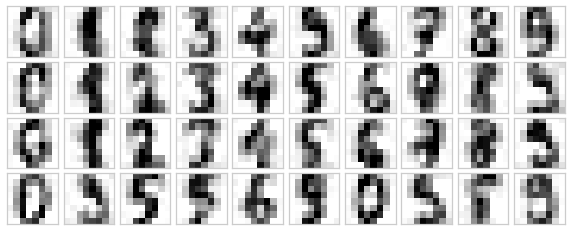

In [415]:
fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(filtered[i].reshape(8, 8), cmap='binary', interpolation='nearest',clim=(0, 16))

# Notes
* PCA 
    * Helpful for Visualization
    * Reducing Feature Space (removing redundancy) can help Speedup Training 
    * PCA will reduce variables, multicollinearity & ensure independence
    * PCA fits when you aren't comfortable performing feature elimination
    * PCA projects data, principal components are not relatable to your original feature set (interpretation)
    * PCA consider the number of principal components to use (% Variation)
    * Combine PCA to improve training times for other algorithms
    * Scale data before running PCA
    * Datasets that can't fit in memory, consider IncrementalPCA
* SVD (and NMF) play a big part in traditional NLP topic modeling (LDA) & Recommenders
* T-SNE & MDS - Runs slowly & sensitive to noise
    * Run through another dimensionality method first (PCA or SVD) to reduce noise & improve speed
    * Feature Select (KBest) passing most promising features to dimensionality